1) Read the data, change the string columns and their values to smallcaps and underscore instead of spaces - ####DONE
2) Look aht ecolumns "totalcharge" and "churn", and correct them accordingly. - ####DONE
3) Split data into Training and validation data sets and testing data sets - Use a function. Create y and delete data["churn"]
   4) Check missing values, dtypes, value_counts() to check if it is imbalanced data sets
   5) Find unique and number iof unique values for each column of categorical types  - ####DONE

4) Checkchurn rate for each group- like male and females and comapre it with global churn. partner and no-partner with global churn/
Calculate risk ratio --> Eg. (churn_no_partner / global_churn), Do this for every categorical column - ####DONE

5) Now caluclate Mutual Information - Mutual_info_score from sklearn for every categorical olum with churn and sort to find wwhcih has max mutual information. -------> TODO

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"/Users/pranayrastogi/PycharmProjects/ML_Zoomcamp/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.shape

(7043, 21)

In [10]:
cols = []
for col in data.columns:
    cols.append(col.lower().replace(" ","_"))

data.columns = cols
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [16]:
categorical_cols = data.select_dtypes(include="object").columns

In [17]:
for col in categorical_cols:
    data[col] = data[col].str.lower().str.replace(" ","_")

data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [18]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [21]:
converted = pd.to_numeric(data["totalcharges"], errors="coerce")
data["totalcharges"].isna().sum(), converted.isna().sum()

(np.int64(0), np.int64(11))

In [23]:
converted[converted.isna()]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: totalcharges, dtype: float64

In [26]:
data.loc[[488,489],"totalcharges"]

488        _
489    74.35
Name: totalcharges, dtype: object

In [27]:
data["totalcharges"] = pd.to_numeric(data["totalcharges"], errors="coerce")
data["totalcharges"] = data["totalcharges"].fillna(0)

In [29]:
data.churn = (data.churn=="yes").astype("int")
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [32]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_test.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3381,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75,0
6180,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85,0
4829,1600-dilpe,female,0,no,no,12,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),45.00,524.35,0
3737,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95,1
4249,7919-zodzz,female,0,yes,yes,10,yes,no,dsl,no,...,yes,no,no,yes,one_year,yes,mailed_check,65.90,660.05,0


In [33]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
df_val.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
565,5846-neqvz,male,0,yes,yes,71,yes,no,dsl,yes,...,yes,yes,no,yes,two_year,yes,credit_card_(automatic),70.85,4973.40,0
199,3645-deygf,male,0,no,yes,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.75,20.75,0
6738,3590-tcxtb,male,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.35,20.35,0
2504,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,...,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20,1
556,2654-vbvpb,female,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),19.90,19.90,0


In [34]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [35]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [37]:
del df_train["churn"]
del df_test["churn"]
del df_val["churn"]

In [38]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50


In [39]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [40]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50


In [41]:
data.churn.value_counts(normalize=True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [42]:
data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [52]:
categorical_cols = list(categorical_cols)
categorical_cols.remove("churn")
categorical_cols

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges']

In [53]:
for col in categorical_cols:
    print(col)
    print(data[col].unique())
    print(data[col].unique())
    print("--------")

customerid
['7590-vhveg' '5575-gnvde' '3668-qpybk' ... '4801-jzazl' '8361-ltmkd'
 '3186-ajiek']
['7590-vhveg' '5575-gnvde' '3668-qpybk' ... '4801-jzazl' '8361-ltmkd'
 '3186-ajiek']
--------
gender
['female' 'male']
['female' 'male']
--------
partner
['yes' 'no']
['yes' 'no']
--------
dependents
['no' 'yes']
['no' 'yes']
--------
phoneservice
['no' 'yes']
['no' 'yes']
--------
multiplelines
['no_phone_service' 'no' 'yes']
['no_phone_service' 'no' 'yes']
--------
internetservice
['dsl' 'fiber_optic' 'no']
['dsl' 'fiber_optic' 'no']
--------
onlinesecurity
['no' 'yes' 'no_internet_service']
['no' 'yes' 'no_internet_service']
--------
onlinebackup
['yes' 'no' 'no_internet_service']
['yes' 'no' 'no_internet_service']
--------
deviceprotection
['no' 'yes' 'no_internet_service']
['no' 'yes' 'no_internet_service']
--------
techsupport
['no' 'yes' 'no_internet_service']
['no' 'yes' 'no_internet_service']
--------
streamingtv
['no' 'yes' 'no_internet_service']
['no' 'yes' 'no_internet_service']


In [54]:
df_group = data.groupby("gender").churn.agg({"mean","count"})
df_group

,count,mean
gender,,
female,3488,0.269209
male,3555,0.261603


In [56]:
global_churn = data.churn.mean()

In [57]:
df_group = data.groupby("partner").churn.agg({"mean","count"})
df_group

,count,mean
partner,,
no,3641,0.329580
yes,3402,0.196649


In [58]:
df_group["diff"] = df_group["mean"] - global_churn
df_group["risk"] = df_group["mean"] / global_churn
df_group

,count,mean,diff,risk
partner,,,,
no,3641,0.329580,0.064210,1.241964
yes,3402,0.196649,-0.068721,0.741038


In [59]:
categorical_cols

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges']

In [60]:
categorical_cols = [
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

for col in categorical_cols:
    df_group = data.groupby(col).churn.agg({"mean","count"})
    df_group["diff"] = df_group["mean"] - global_churn
    df_group["risk"] = df_group["mean"] / global_churn
    print(df_group)
    print("=======")

        count      mean      diff      risk
gender                                     
female   3488  0.269209  0.003839  1.014466
male     3555  0.261603 -0.003766  0.985807
         count      mean      diff      risk
partner                                     
no        3641  0.329580  0.064210  1.241964
yes       3402  0.196649 -0.068721  0.741038
            count      mean      diff      risk
dependents                                     
no           4933  0.312791  0.047422  1.178700
yes          2110  0.154502 -0.110868  0.582215
              count      mean      diff      risk
phoneservice                                     
no              682  0.249267 -0.016103  0.939319
yes            6361  0.267096  0.001726  1.006506
                  count      mean      diff      risk
multiplelines                                        
no                 3390  0.250442 -0.014927  0.943749
no_phone_service    682  0.249267 -0.016103  0.939319
yes                2971  0.286099  0

## Mutual Information : To measure the importance of categorical features

#### Calculate Mututal info score 

In [ ]:
from sklearn.metrics import mutual_info_score


In [62]:
from sklearn.metrics import mutual_info_score

In [67]:
def calculate_mutual_info_score(col1):
    return mutual_info_score(col1, data.churn)

mi = data[categorical_cols].apply(calculate_mutual_info_score)
mi

gender              0.000037
partner             0.011454
dependents          0.014467
phoneservice        0.000072
multiplelines       0.000801
internetservice     0.055574
onlinesecurity      0.064677
onlinebackup        0.046792
deviceprotection    0.043917
techsupport         0.063021
streamingtv         0.031908
streamingmovies     0.032001
contract            0.098453
paperlessbilling    0.019194
paymentmethod       0.044519
dtype: float64

In [68]:
mi.sort_values(ascending=False)

contract            0.098453
onlinesecurity      0.064677
techsupport         0.063021
internetservice     0.055574
onlinebackup        0.046792
paymentmethod       0.044519
deviceprotection    0.043917
streamingmovies     0.032001
streamingtv         0.031908
paperlessbilling    0.019194
dependents          0.014467
partner             0.011454
multiplelines       0.000801
phoneservice        0.000072
gender              0.000037
dtype: float64

## Correlation Coefficent: To measure the dependence between two random variables

In [70]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn'], dtype='object')

In [71]:
numeric_cols = ['tenure', 'monthlycharges', 'totalcharges']
numeric_cols

['tenure', 'monthlycharges', 'totalcharges']

In [72]:
data[numeric_cols].corrwith(data.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.198324
dtype: float64

In [ ]:
data[dat]

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

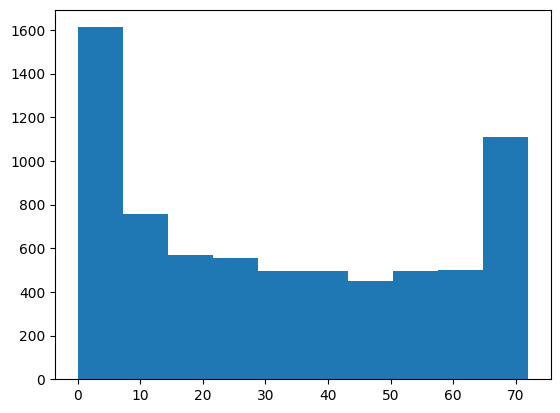

In [74]:
plt.hist(data.tenure)

In [75]:
data[data.tenure < 8].churn.mean()

np.float64(0.5179900744416873)

In [76]:
data[data.tenure > 50].churn.mean()

np.float64(0.08931116389548693)

In [77]:
data[(data.tenure > 8) & (data.tenure < 50)].churn.mean()

np.float64(0.2532695374800638)